# §3 モデリング

#### Packageの読み込み

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import statsmodels.api as sm

#### Dataの読み込み（セクション2までのまとめ）

In [2]:
df1 = pd.read_csv("./csv/japan/newly_confirmed_cases_daily.csv")

# Indexを変更し日付型に変換
df2 = df1.set_index("Date")
df2.index = pd.to_datetime(df2.index)

# ①原系列の定義
df3 = df2[(df2.index >= '2020-05-01') & (df2.index <= '2023-04-30')]
df = df3[["ALL"]].copy()
df.rename(columns={"ALL": "original"}, inplace = True)

#### その他の変数の定義

In [3]:
# ②移動平均の定義
df["MA"] = df["original"].rolling(window=7,min_periods=1).mean()

# ③対数系列の定義
c = 1e-5#ゼロを含むため極小さな値を入れる
df["log"] = np.log(df["original"]+c)

# ④一次差分系列の定義
df['1day_diff'] = df["original"].diff(1)

# ⑤季節階差（週トレンド）の定義
df['7day_diff'] =df ["original"].diff(7)

# ⑥対数1次差分系列
df["log_1day_diff"] = df["log"].diff(1) 

# ⑦対数7次差分系列
df["log_7day_diff"] = df["log"].diff(7) 

#### 欠損値の確認

In [4]:
df.head()
print(df.isna().sum())

original         0
MA               0
log              0
1day_diff        1
7day_diff        7
log_1day_diff    1
log_7day_diff    7
dtype: int64


#### 各系列データを描画

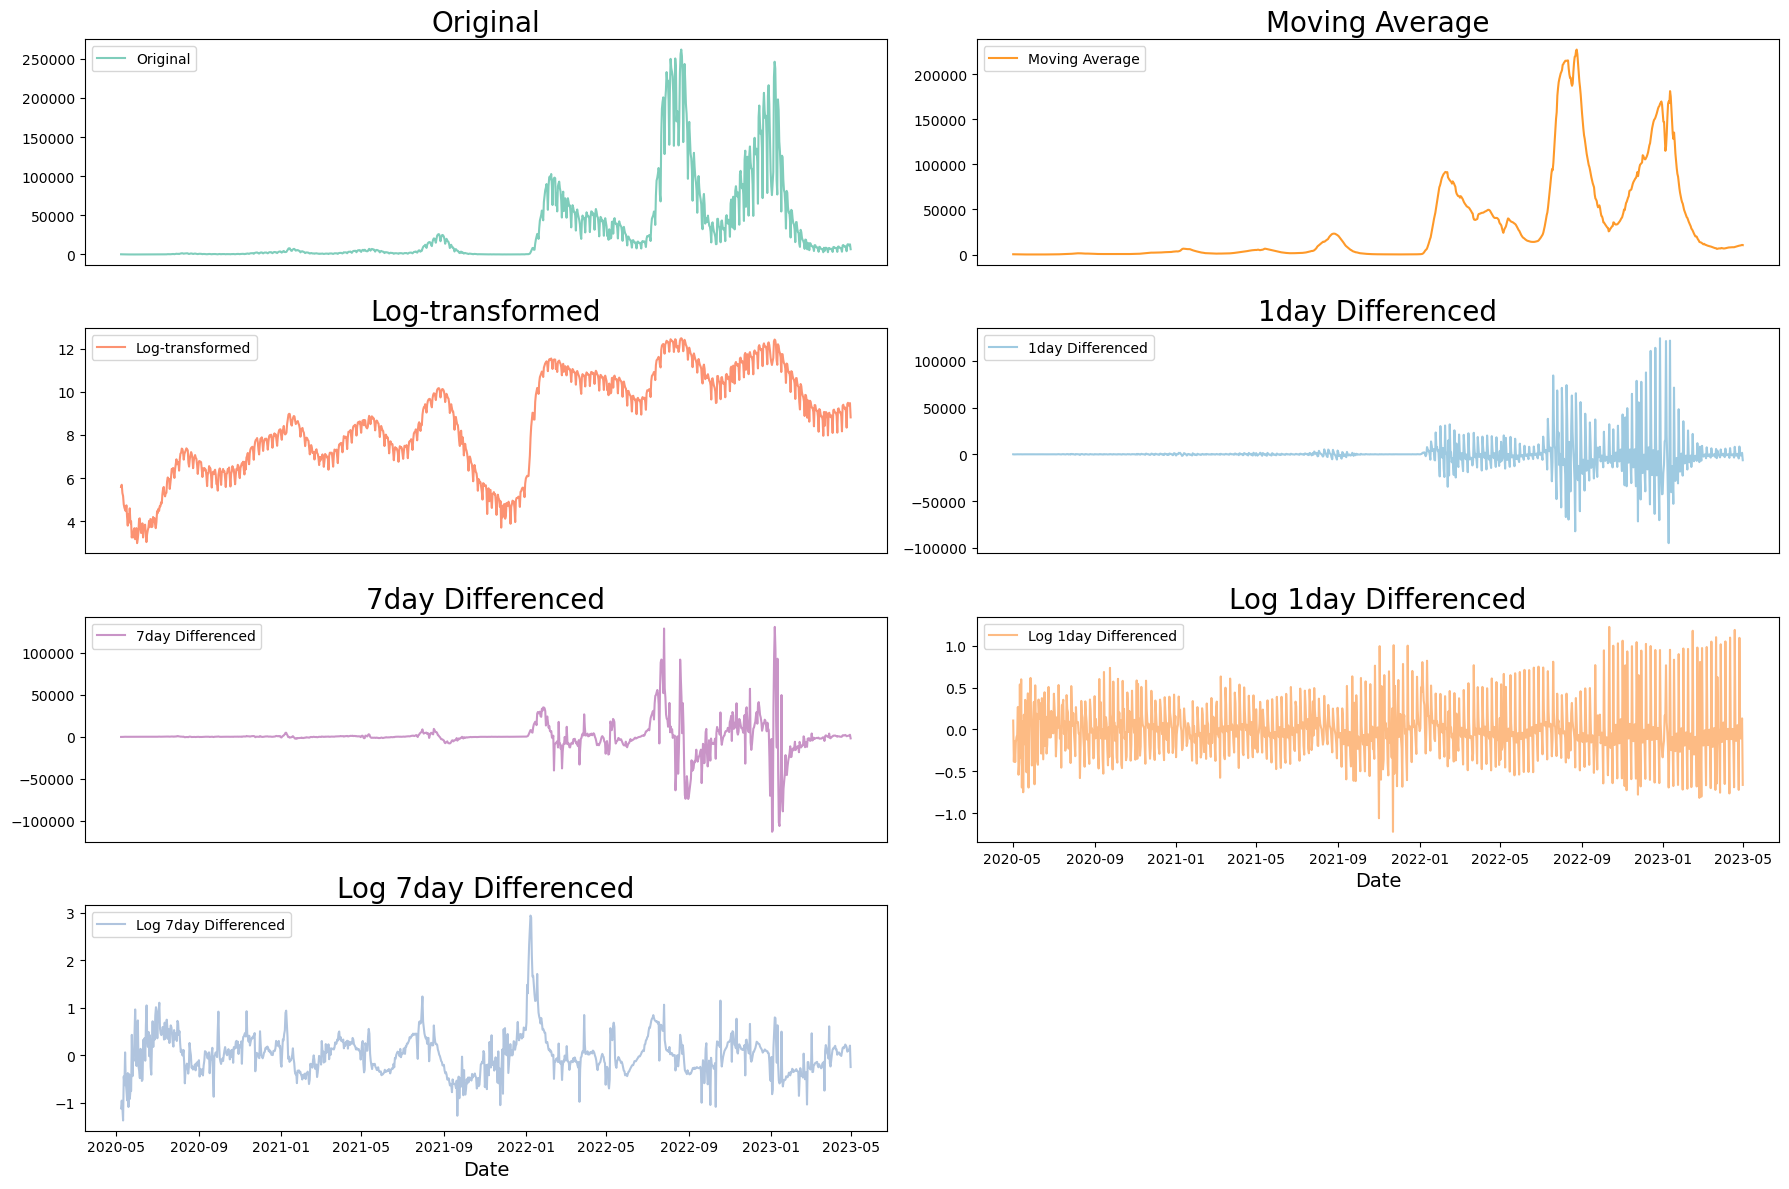

In [5]:
plt.figure(figsize=(18, 12))

# 原系列
plt.subplot(4, 2, 1)
plt.plot(df.index, df["original"], label='Original', color="#7FCDBB")
plt.title('Original', fontsize=20)
plt.legend(loc='upper left')
plt.xticks([])

# 移動平均
plt.subplot(4, 2, 2)
plt.plot(df.index, df["MA"], label="Moving Average", color="#FE9929")
plt.title('Moving Average', fontsize=20)
plt.legend(loc='upper left')
plt.xticks([])

# 対数系列
plt.subplot(4, 2, 3)
plt.plot(df.index, df["log"], label="Log-transformed", color='#FC9272')
plt.title("Log-transformed", fontsize=20)
plt.legend(loc='upper left')
plt.xticks([])

# 一次差分系列
plt.subplot(4, 2, 4)
plt.plot(df.index, df["1day_diff"], label='1day Differenced', color='#9ECAE1')
plt.title('1day Differenced', fontsize=20)
plt.legend(loc='upper left')
plt.xticks([])

# 季節階差系列
plt.subplot(4, 2, 5)
plt.plot(df.index, df["7day_diff"], label='7day Differenced', color='#C994C7')
plt.title("7day Differenced", fontsize=20)
plt.legend(loc='upper left')
plt.xticks([])

# 対数一次差分系列
plt.subplot(4, 2, 6)
plt.plot(df.index, df["log_1day_diff"], label='Log 1day Differenced', color='#FDBB84')
plt.title('Log 1day Differenced', fontsize=20)
plt.legend(loc='upper left')
plt.xlabel('Date',fontsize=14)

# 対数季節階差系列
plt.subplot(4, 2, 7)
plt.plot(df.index, df["log_7day_diff"], label='Log 7day Differenced', color='#B0C4DE')
plt.title('Log 7day Differenced', fontsize=20)
plt.legend(loc='upper left')
plt.xlabel('Date',fontsize=14)

plt.tight_layout()
plt.savefig('./image/time_series1.jpeg', dpi=300)
plt.show()


#### 時系列分解（Seasonal Decompose）

In [6]:
# ①原系列の分解（multiplicative）
decompose1 = sm.tsa.seasonal_decompose(df["original"], model='aditive')

# ②移動平均系列の分解
decompose2 = sm.tsa.seasonal_decompose(df["MA"], model='additive', period=7)

# ③対数系列の分解
decompose3 = sm.tsa.seasonal_decompose(df["log"], model='additive', period=7)

# ④一次差分系列の分解
decompose4 = sm.tsa.seasonal_decompose(df["1day_diff"].dropna(), model='additive', period=7)

# ⑤季節階差系列の分解
decompose5 = sm.tsa.seasonal_decompose(df["7day_diff"].dropna(), model='additive', period=7)

# ⑥対数一次差分系列の分解
decompose6 = sm.tsa.seasonal_decompose(df["log_1day_diff"].dropna(), model='additive', period=7)

# ⑦対数季節階差系列の分解
decompose7 = sm.tsa.seasonal_decompose(df["log_7day_diff"].dropna(), model='additive', period=7)

# 分解した成分を取得
#trend = decompose.trend
#seasonal = decompose.seasonal
#residual = decompose.resid

#### 4系列の構造分解をグラフに出力用

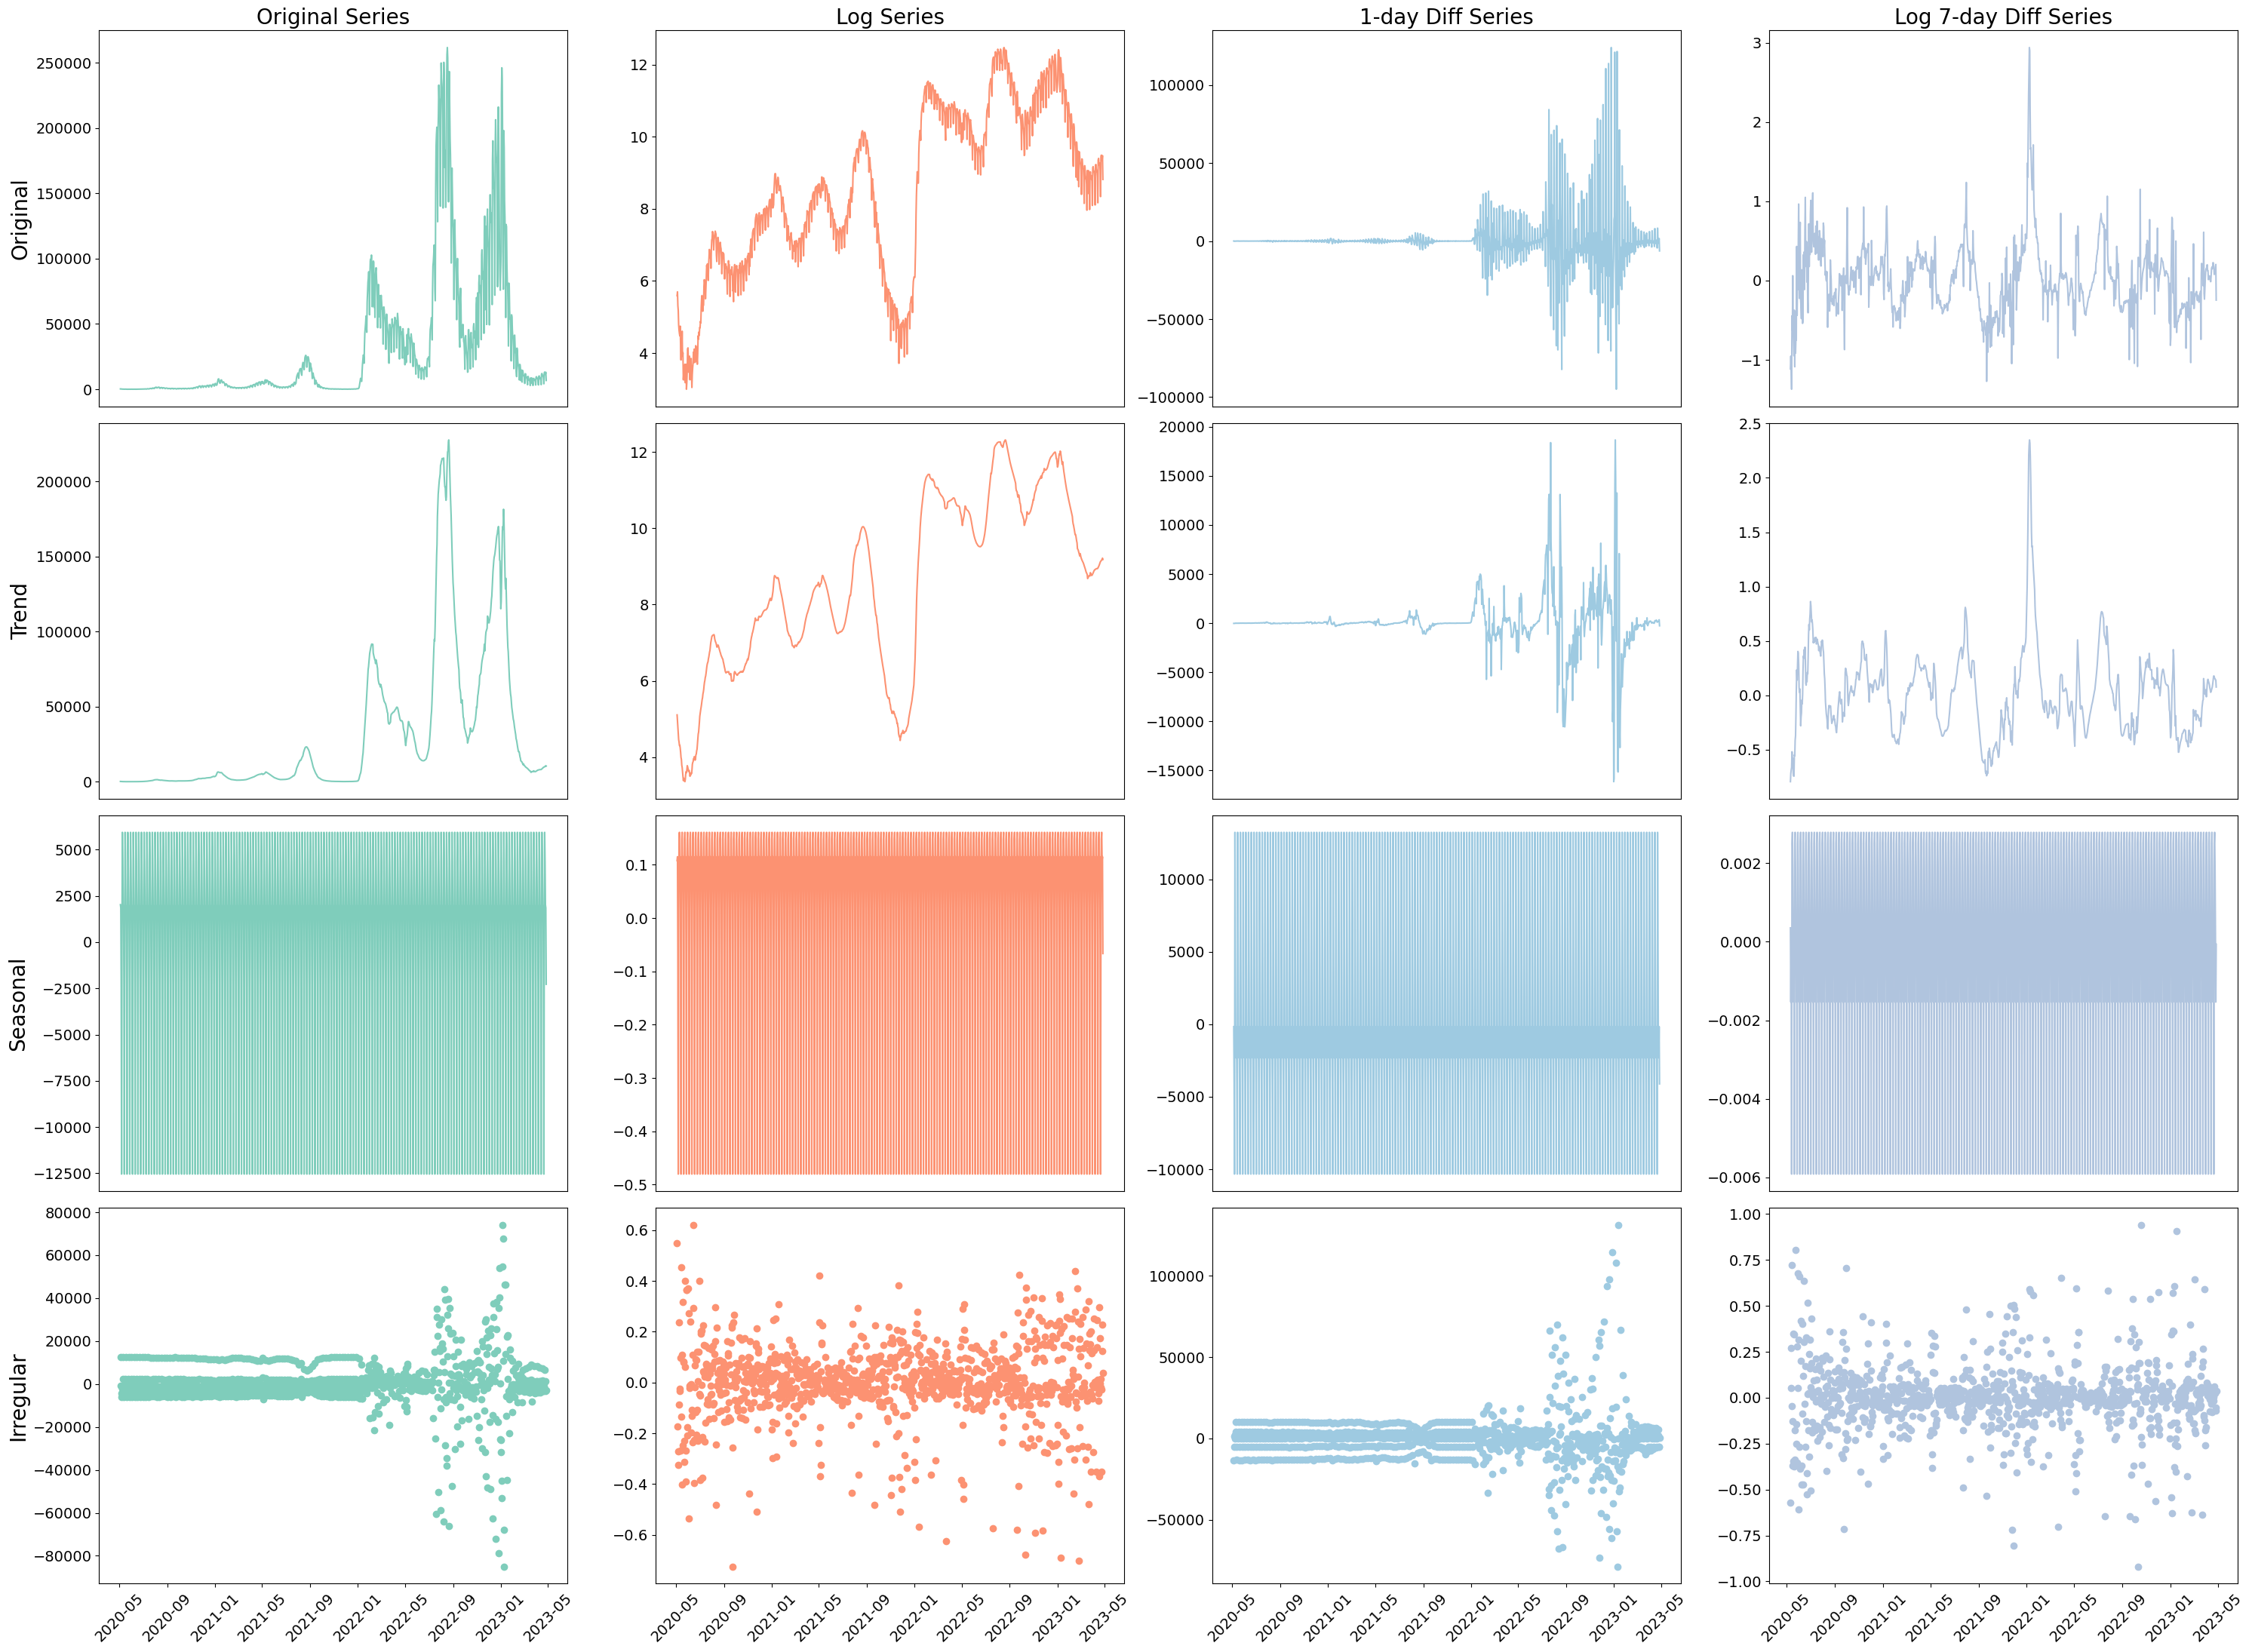

In [7]:
plt.figure(figsize=(30, 22))

# 原系列のプロット
plt.subplot(4, 4, 1)
plt.plot(df.index, df["original"], label="Original Series", color="#7FCDBB")
plt.title("Original Series", fontsize=20)
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Original", fontsize=20)

plt.subplot(4, 4, 5)
plt.plot(df.index, decompose1.trend, label="Original Trend", color="#7FCDBB")
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Trend", fontsize=20)

plt.subplot(4, 4, 9)
plt.plot(df.index, decompose1.seasonal, label="Original Seasonal", color="#7FCDBB")
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Seasonal", fontsize=20)

plt.subplot(4, 4, 13)
plt.scatter(df.index, decompose1.resid, label="Original Residual", color="#7FCDBB")
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel("Irregular", fontsize=20)


# 対数系列のプロット
plt.subplot(4, 4, 2)
plt.plot(df.index, df["log"], label="Log Series", color='#FC9272')
plt.title("Log Series", fontsize=20)
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(4, 4, 6)
plt.plot(df.index, decompose3.trend, label="Log Trend", color='#FC9272')
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(4, 4, 10)
plt.plot(df.index, decompose3.seasonal, label="Log Seasonal", color='#FC9272')
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(4, 4, 14)
plt.scatter(df.index, decompose3.resid, label="Log Residual", color='#FC9272')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# 一次差分系列のプロット
one_day_diff_index = df["1day_diff"].dropna().index
plt.subplot(4, 4, 3)
plt.plot(one_day_diff_index, df["1day_diff"].dropna(), label="1-day Diff Series", color='#9ECAE1')
plt.title("1-day Diff Series", fontsize=20)
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(4, 4, 7)
plt.plot(one_day_diff_index, decompose4.trend, label="1-day Diff Trend", color='#9ECAE1')
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(4, 4, 11)
plt.plot(one_day_diff_index, decompose4.seasonal, label="1-day Diff Seasonal", color='#9ECAE1')
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(4, 4, 15)
plt.scatter(one_day_diff_index, decompose4.resid, label="1-day Diff Residual", color='#9ECAE1')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

# 対数季節階差系列のプロット
log_7day_diff_index = df["log_7day_diff"].dropna().index
plt.subplot(4, 4, 4)
plt.plot(log_7day_diff_index, df["log_7day_diff"].dropna(), label="Log 7-day Diff Series", color='#B0C4DE')
plt.title("Log 7-day Diff Series", fontsize=20)
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(4, 4, 8)
plt.plot(log_7day_diff_index, decompose7.trend, label="Log 7-day Diff Trend", color='#B0C4DE')
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(4, 4, 12)
plt.plot(log_7day_diff_index, decompose7.seasonal, label="Log 7-day Diff Seasonal", color='#B0C4DE')
plt.xticks([], fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(4, 4, 16)
plt.scatter(log_7day_diff_index, decompose7.resid, label="Log 7-day Diff Residual", color='#B0C4DE')
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.savefig('./image/decompose_4x4.jpeg', dpi=300)
plt.show()

#### 周期性の確認

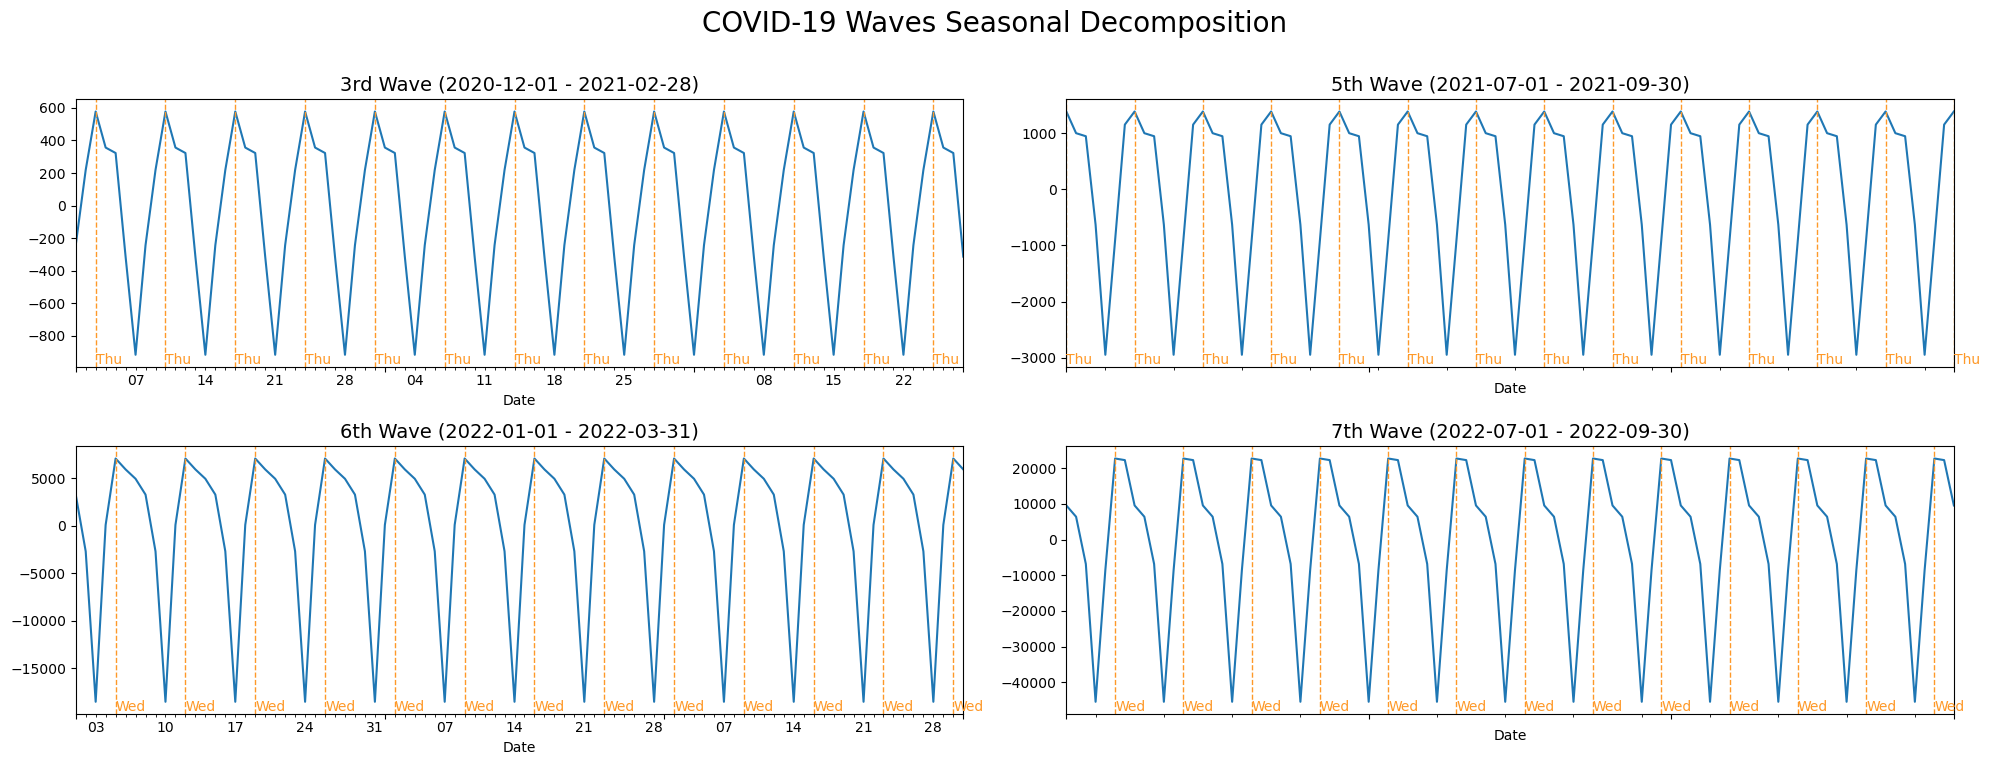

In [10]:
waves = {
    '3rd Wave': ('2020-12-01', '2021-02-28'),
    '5th Wave': ('2021-07-01', '2021-09-30'),
    '6th Wave': ('2022-01-01', '2022-03-31'),
    '7th Wave': ('2022-07-01', '2022-09-30')
}

# グラフのサイズ設定
plt.figure(figsize=(20, 8))

# 各波に対して処理を実行
for i, (wave, (start, end)) in enumerate(waves.items(), 1):
    df_wave = df.loc[start:end]["original"]
    decompose = sm.tsa.seasonal_decompose(df_wave.dropna(), model='additive')
    
    # 季節性成分から最初の週の最大値を見つける
    seasonal = decompose.seasonal
    first_week_max = seasonal.iloc[:7].idxmax()

    # サブプロットの追加（2×2形式）
    ax = plt.subplot(2, 2, i)
    decompose.seasonal.plot(ax=ax)

    # 最初の最大値から開始して7日ごとに線を引く
    for j in range(0, len(df_wave), 7):
        max_date = first_week_max + pd.Timedelta(days=j)
        if max_date in df_wave.index:
            ax.axvline(max_date, color="#FE9929", linestyle='--', linewidth=1)
            ax.text(max_date, ax.get_ylim()[0], max_date.strftime('%a'), verticalalignment='bottom', horizontalalignment='left', color="#FE9929")
    
    # x軸の日付フォーマット設定（黒字の曜日を非表示にする）
    ax.set_xticklabels([])
    ax.xaxis.set_major_formatter(mdates.DateFormatter(''))

    # タイトルと軸のフォント設定
    ax.set_title(f"{wave} ({start} - {end})", fontsize=14)

# 全体のタイトル設定
plt.suptitle("COVID-19 Waves Seasonal Decomposition", fontsize=20)

# グラフのレイアウト調整と表示
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.savefig('./image/covid_waves_seasonal_decomposition.jpeg', dpi=300)
plt.show()

*To be continue...*